# Visualize Images

### Disease Examples

Image for: Atelectasis img_id: /datasets/ChestXray-NIHCC/images/00013118_008.png


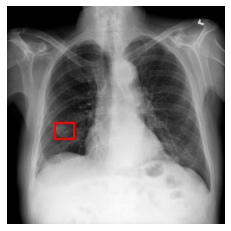

Image for: Pneumothorax img_id: /datasets/ChestXray-NIHCC/images/00019892_003.png


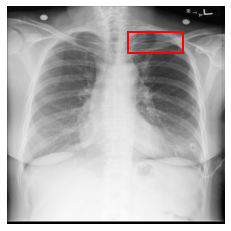

Image for: Effusion img_id: /datasets/ChestXray-NIHCC/images/00010172_001.png


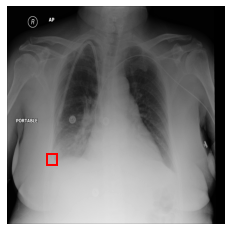

Image for: Pneumonia img_id: /datasets/ChestXray-NIHCC/images/00011136_002.png


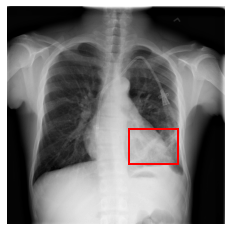

Image for: Cardiomegaly img_id: /datasets/ChestXray-NIHCC/images/00005066_030.png


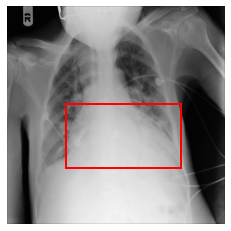

Image for: Nodule img_id: /datasets/ChestXray-NIHCC/images/00001688_000.png


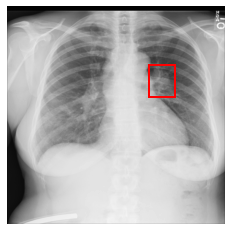

Image for: Mass img_id: /datasets/ChestXray-NIHCC/images/00023075_033.png


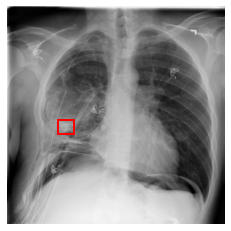

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from constants import LABEL_ENCODINGS
from PIL import Image
import matplotlib.patches as patches

bbox_file = 'BBox_List_2017.csv'
images_root_dir = '/datasets/ChestXray-NIHCC/images/'

def plot_img( img, x, y, w, h, filename ):
    
    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(img, cmap='gray')

    # Create a Rectangle patch
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
    plt.axis('off')

    plt.show()
    filename = os.path.join( './report_images/', filename )
    fig.savefig( filename, bbox_inches='tight' )


entries = pd.read_csv(bbox_file, index_col=1)
disease = list( LABEL_ENCODINGS.keys() )[0]

for disease in LABEL_ENCODINGS:
    for i in range(1):
        if disease not in entries.index:
            continue
        row = entries.loc[disease].iloc[0]
        img_file = os.path.join( images_root_dir, row['Image Index'] )
        bbox = row[1:5]
        x, y, w, h = bbox[0], bbox[1], bbox[2], bbox[3]
        img = Image.open(img_file).convert("L")
        print( f'Image for: {disease} img_id: {img_file}' )
        plot_img( img, x, y, w, h, filename=f'{disease}.png' )





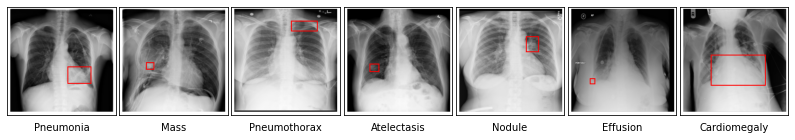

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

%matplotlib inline

def imshow_grid( images, diseases, shape=(2,8), filename='./report_images/dis-grid.png' ):
    cmap = None
    fig = plt.figure(1, figsize=(14,14))
    grid = ImageGrid(fig, 111, nrows_ncols=shape, axes_pad=0.05)
    size = shape[0] * shape[1]
    for i in range(size):
        grid[i].set_xlabel(diseases[i])
        grid[i].tick_params( axis='both', which='both', length=0,
                           bottom=False )
        grid[i].set_xticklabels([])
        grid[i].set_yticklabels([])
        grid[i].imshow(images[i], cmap=cmap)
    plt.show()
    fig.savefig( filename, bbox_inches='tight' )
    
report_imgs_dir = './report_images/'

imgs = []
diseases = []
for img_file in os.listdir(report_imgs_dir):
    if 'grid' in img_file:
        continue
    full_img_file = os.path.join( report_imgs_dir, img_file )
    img = Image.open(full_img_file)
    imgs.append(img)
    disease = img_file.split('.')[0]
    diseases.append(disease)

imshow_grid( imgs, diseases, ( 1, 7) )